In [1]:
import pink
import tools
import numpy as np

print(pink.__version__)

2.4 revision 82a32d4


In [2]:
myiter = iter(tools.DataIterator("../data/Morphology_EFIGI_gri_small.bin"))
images = np.array(list(myiter))#.swapaxes(1, 3)
images = (images - np.amin(images)) / (np.amax(images) - np.amin(images))

print(images.shape)
print('min value: ', np.amin(images))
print('max value: ', np.amax(images))

version: 2
file_type: 0
data_type: 0
number_of_images: 14
layout: 0
dimensionality: 3
dimensions: [500 500   3]
size: 750000
(13, 500, 500, 3)
min value:  0.0
max value:  1.0


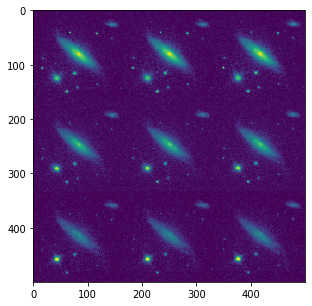

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.imshow(images[0,:,:,0])

In [4]:
import math

som_dim = 2
neuron_dim = int(myiter.dimensions[0] / math.sqrt(2.0) * 2.0)
euclid_dim = int(myiter.dimensions[0] * math.sqrt(2.0) / 2.0)
number_of_channnels = 3

print("neuron_dim = ", neuron_dim)
print("euclid_dim = ", euclid_dim)

np_som = np.random.rand(som_dim, som_dim, number_of_channnels, neuron_dim, neuron_dim).astype(np.float32)
som = pink.SOM(np_som, neuron_layout="cartesian-3d")

trainer = pink.Trainer(som, number_of_rotations=180,
                       euclidean_distance_dim=euclid_dim,
                       use_gpu=False)

neuron_dim =  707
euclid_dim =  353


In [5]:
from tqdm.notebook import tqdm, trange

#for j in trange(10):
#for i in range(len(images)):
trainer(pink.Data(images[0], layout="cartesian-3d"))

RuntimeError: Images must be quadratic.

In [ ]:
trainer.update_som()
np_som = np.array(som, copy=True)
print(np_som.shape)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(np_som[:,:,0,:,:].swapaxes(1, 2).reshape((som_dim * neuron_dim, som_dim * neuron_dim)))
plt.grid(False)